# Identify Cloud-Free Timesteps
Cashews has 72 samples with 70 samples. Of those, many have clouds. In this notebook we identify the 25 clearest days.

In [1]:
from torchgeo.datasets import BeninSmallHolderCashews
SRC_DATASET_DIR = '/mnt/data/cc_benchmark/source/smallholder_cashew/'
cashew = BeninSmallHolderCashews(root=SRC_DATASET_DIR, download=False, checksum=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figsize = (15, 15)

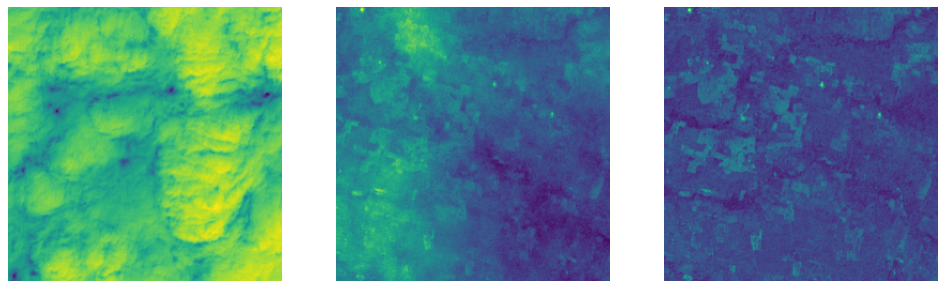

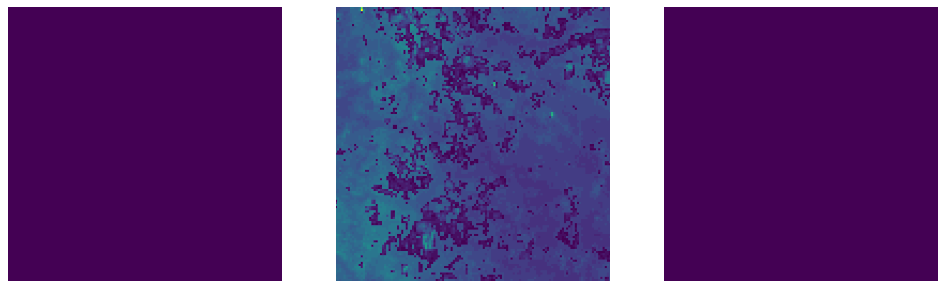

In [3]:
# Plot some examples
x = cashew[0]['image']

plt.figure(figsize=figsize, dpi=80)

for t in range(3):
    plt.subplot(1,3,t+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(x[t][2]) # plot green channel
    plt.axis('off')
    
    
plt.figure(figsize=figsize, dpi=80)

for t in range(3):
    plt.subplot(1,3,t+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(x[t][-1]) # plot cloud coverage
    plt.axis('off')

Clearest 25 days [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 19, 20, 22, 23, 27, 28, 30, 33, 37, 38, 69]


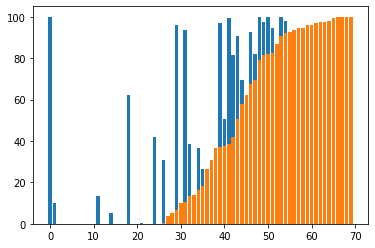

In [5]:
# Cloud distribution
import numpy as np
def get_cloud(x):
    return x[:,-1].mean(-1).mean(-1)

clouds = []
for i, sample in enumerate(cashew):
    cloud = get_cloud(sample['image'])
    clouds.append(np.asarray(cloud))
    #if i>10:
    #    break

total_clouds = np.mean(clouds, 0)
plt.bar(range(70), total_clouds)
plt.bar(range(70), sorted(total_clouds))
N = 25
threshold = sorted(total_clouds)[N]
noclouds_25 = [t for t, r in enumerate(total_clouds) if r<threshold]
print('Clearest 25 days', noclouds_25)


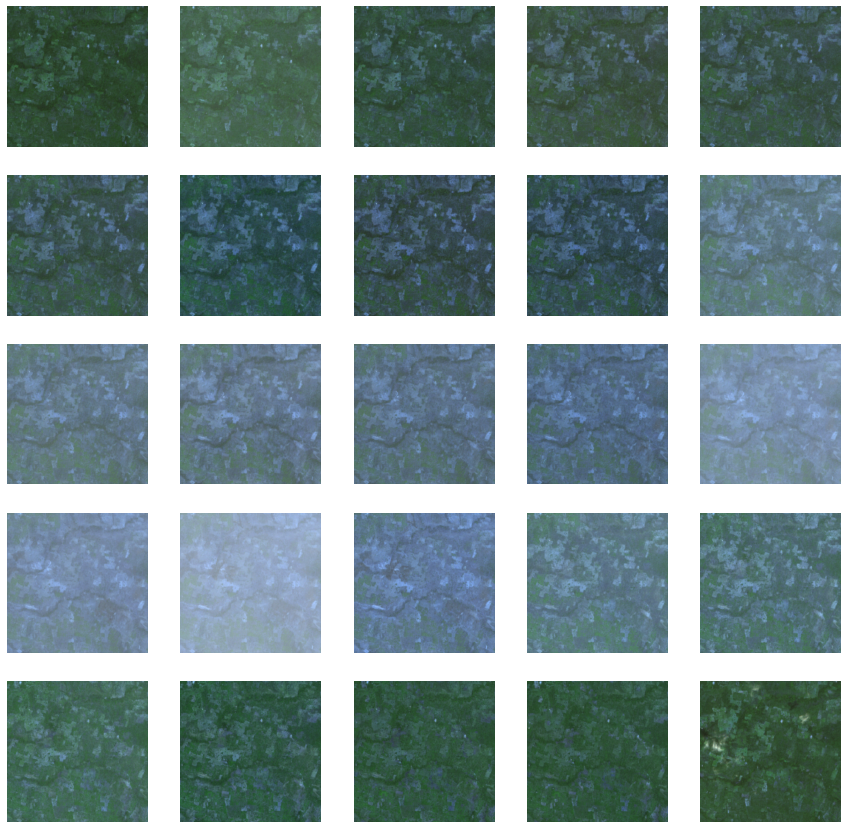

In [6]:
# Try out
plt.figure(figsize=(15,15))
for t in range(25):
    T = noclouds_25[t]
    plt.subplot(5,5,t+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow((x[T][1:4]/x[T][1:4].max()).permute(1,2,0)) # plot green
    plt.axis('off')